In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from keras.datasets import cifar10

(X_train,y_train),(X_test,y_test)=cifar10.load_data()






In [26]:
print(f'Training data shape: {X_train.shape}, {y_train.shape}')
print(f'Test data shape: {X_test.shape}, {y_test.shape}')

Training data shape: (50000, 32, 32, 3), (50000, 10)
Test data shape: (10000, 32, 32, 3), (10000, 10)


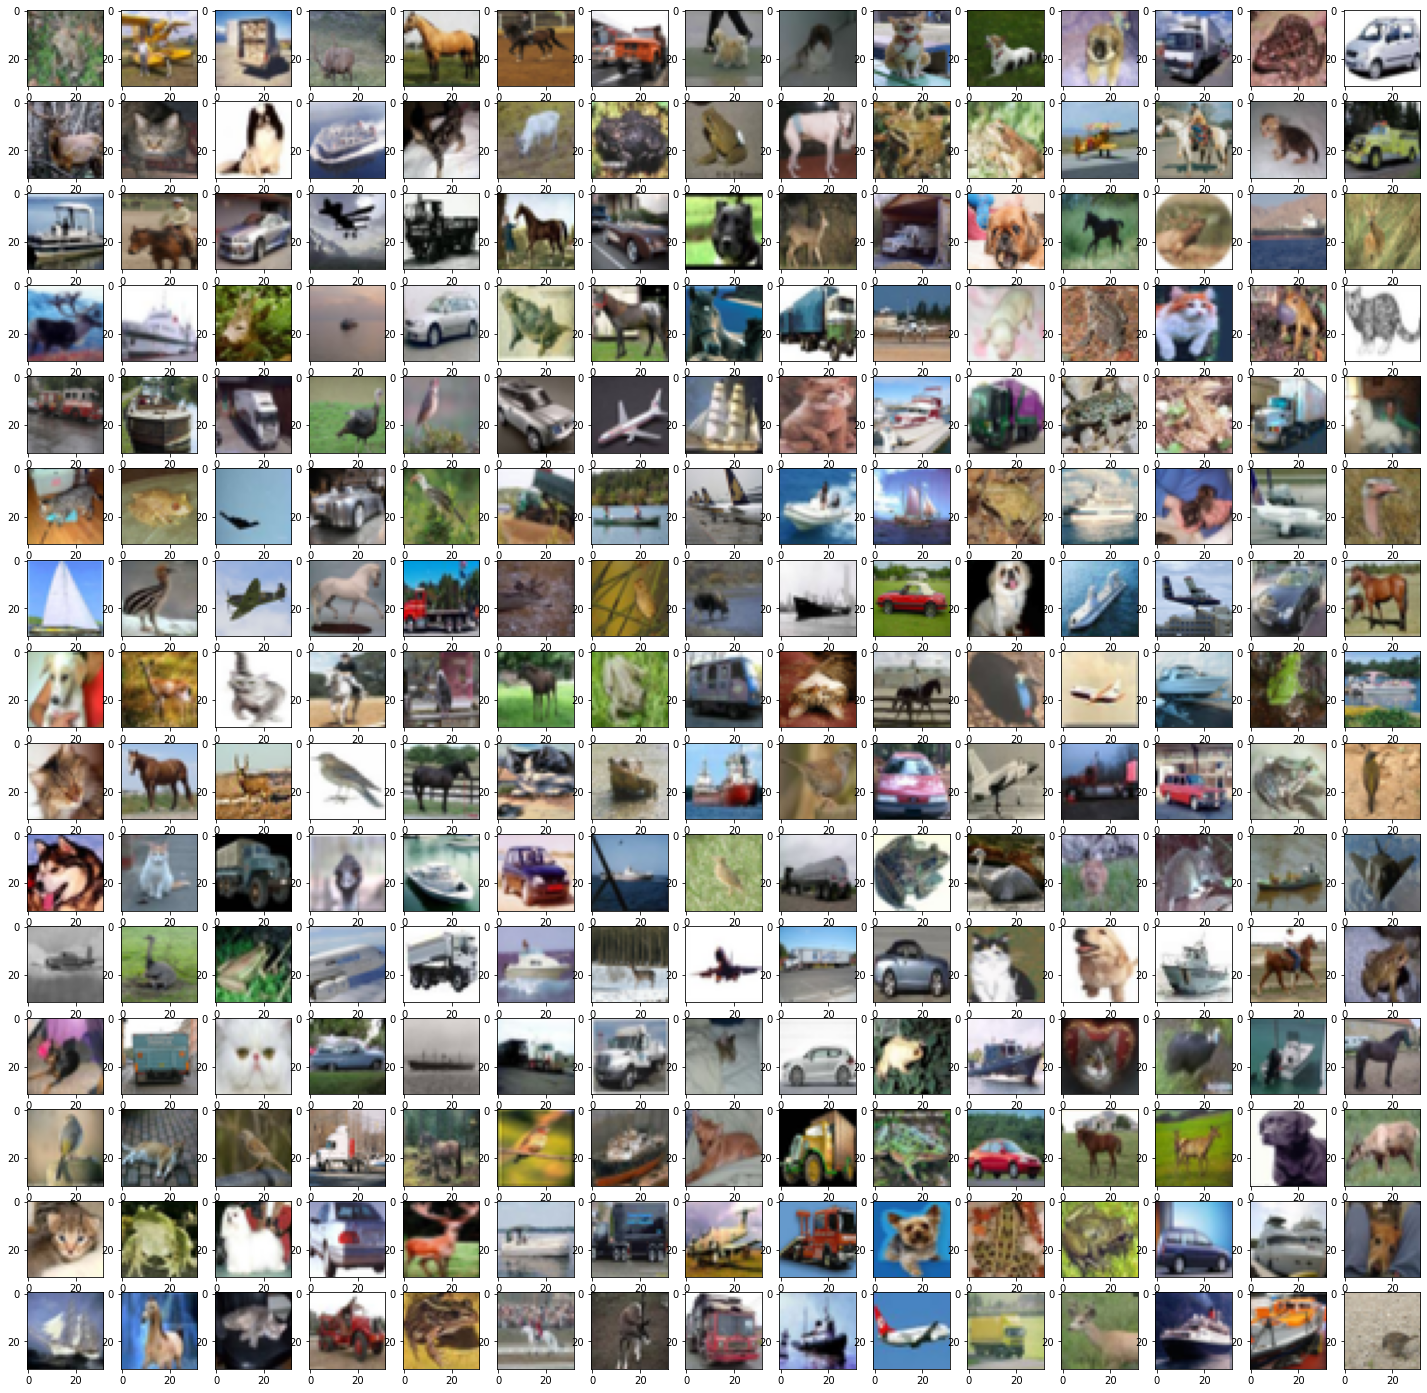

In [9]:
fig,axes=plt.subplots(15,15,figsize=(25,25))
axes=axes.ravel()
nx=len(X_train)
for i in np.arange(0,15*15):
    index=np.random.randint(0,nx)
    axes[i].imshow(X_train[index])

In [27]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

import keras

y_train=keras.utils.to_categorical(y_train,10)
y_train

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0.

In [11]:
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [12]:
y_test=keras.utils.to_categorical(y_test,10)

In [13]:
X_train=X_train/255
X_test=X_test/255

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [9]:
cnn_model = Sequential()


cnn_model.add(Conv2D(filters=32,kernel_size= (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(Conv2D(filters=32,kernel_size= (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.2))
              
cnn_model.add(Conv2D(filters=64,kernel_size= (3, 3), activation='relu'))
cnn_model.add(Conv2D(filters=64,kernel_size= (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.2))
              
cnn_model.add(Flatten())
cnn_model.add(Dense(units=1024, activation='relu'))
cnn_model.add(Dense(units=1024, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))
              
              

cnn_model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001),  loss='categorical_crossentropy',metrics=['accuracy'])

C:\Users\TARUN KUMAR\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
history=cnn_model.fit(X_train,y_train,batch_size=32,epochs=4,shuffle=True)

Epoch 1/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7367 - loss: 0.7789
Epoch 2/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7507 - loss: 0.7395
Epoch 3/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7641 - loss: 0.7193
Epoch 4/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.7731 - loss: 0.6870


In [74]:
predicted_classes=cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


In [75]:
predicted_classes

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [76]:
cnn_model.save('cnn_model1.h5')


In [14]:
from tensorflow.keras.models import  load_model
loaded_model = load_model('cnn_model1.h5')
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test)
print(f"Test accuracy of loaded model: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7185 - loss: 0.8591
Test accuracy of loaded model: 0.7120


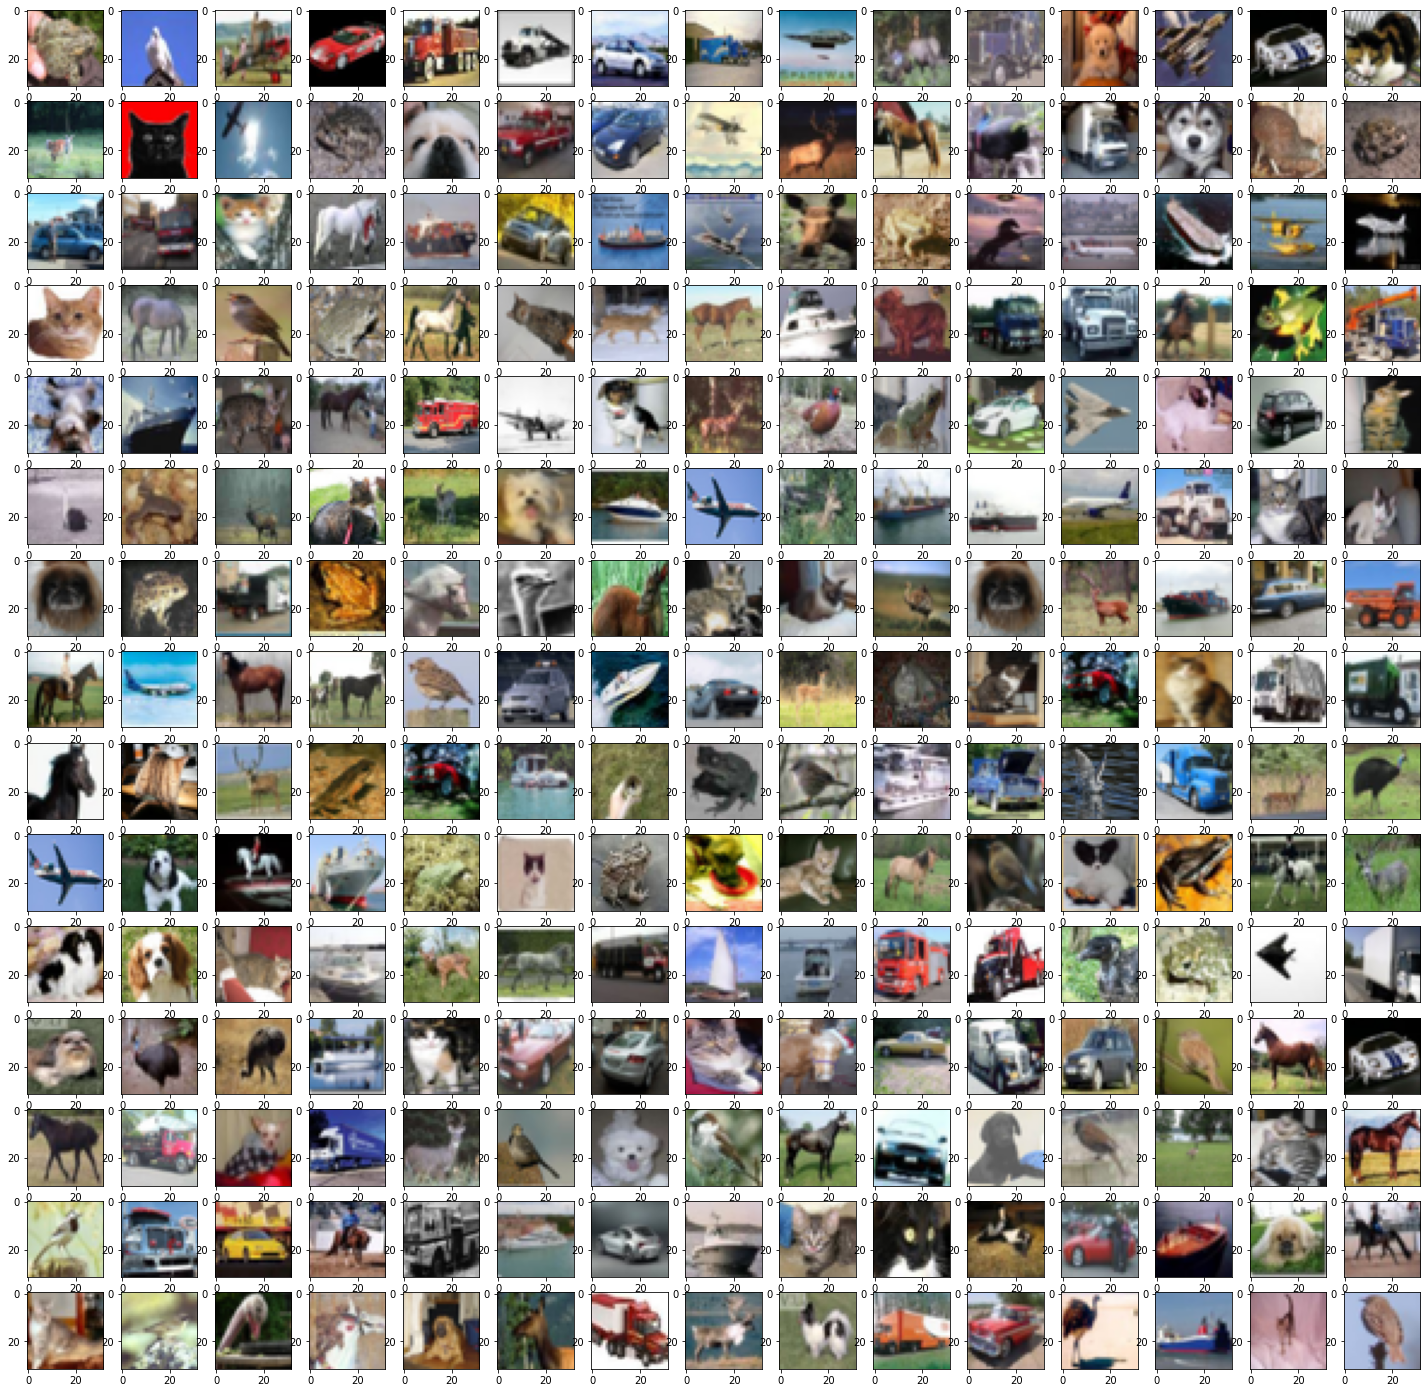

In [15]:
fig,axes=plt.subplots(15,15,figsize=(25,25))
axes=axes.ravel()
nx=len(X_test)
for i in np.arange(0,15*15):
    index=np.random.randint(0,nx)
    axes[i].imshow(X_train[index])

In [16]:
predictions = loaded_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


In [17]:
predictions[0]*100

array([ 0.74392855,  0.7789133 ,  0.64399636, 49.22121   ,  0.5091532 ,
       40.75412   ,  3.2889616 ,  2.1409798 ,  0.1392679 ,  1.779481  ],
      dtype=float32)

In [18]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [19]:
# y_test = np.argmax(y_test, axis=1)

# Now y_test_original will contain the original categorical labels
print(y_test)
print(y_test[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)


  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

#   plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
#                                 100*np.max(predictions_array),
#                                 class_names[true_label]),
#                                 color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

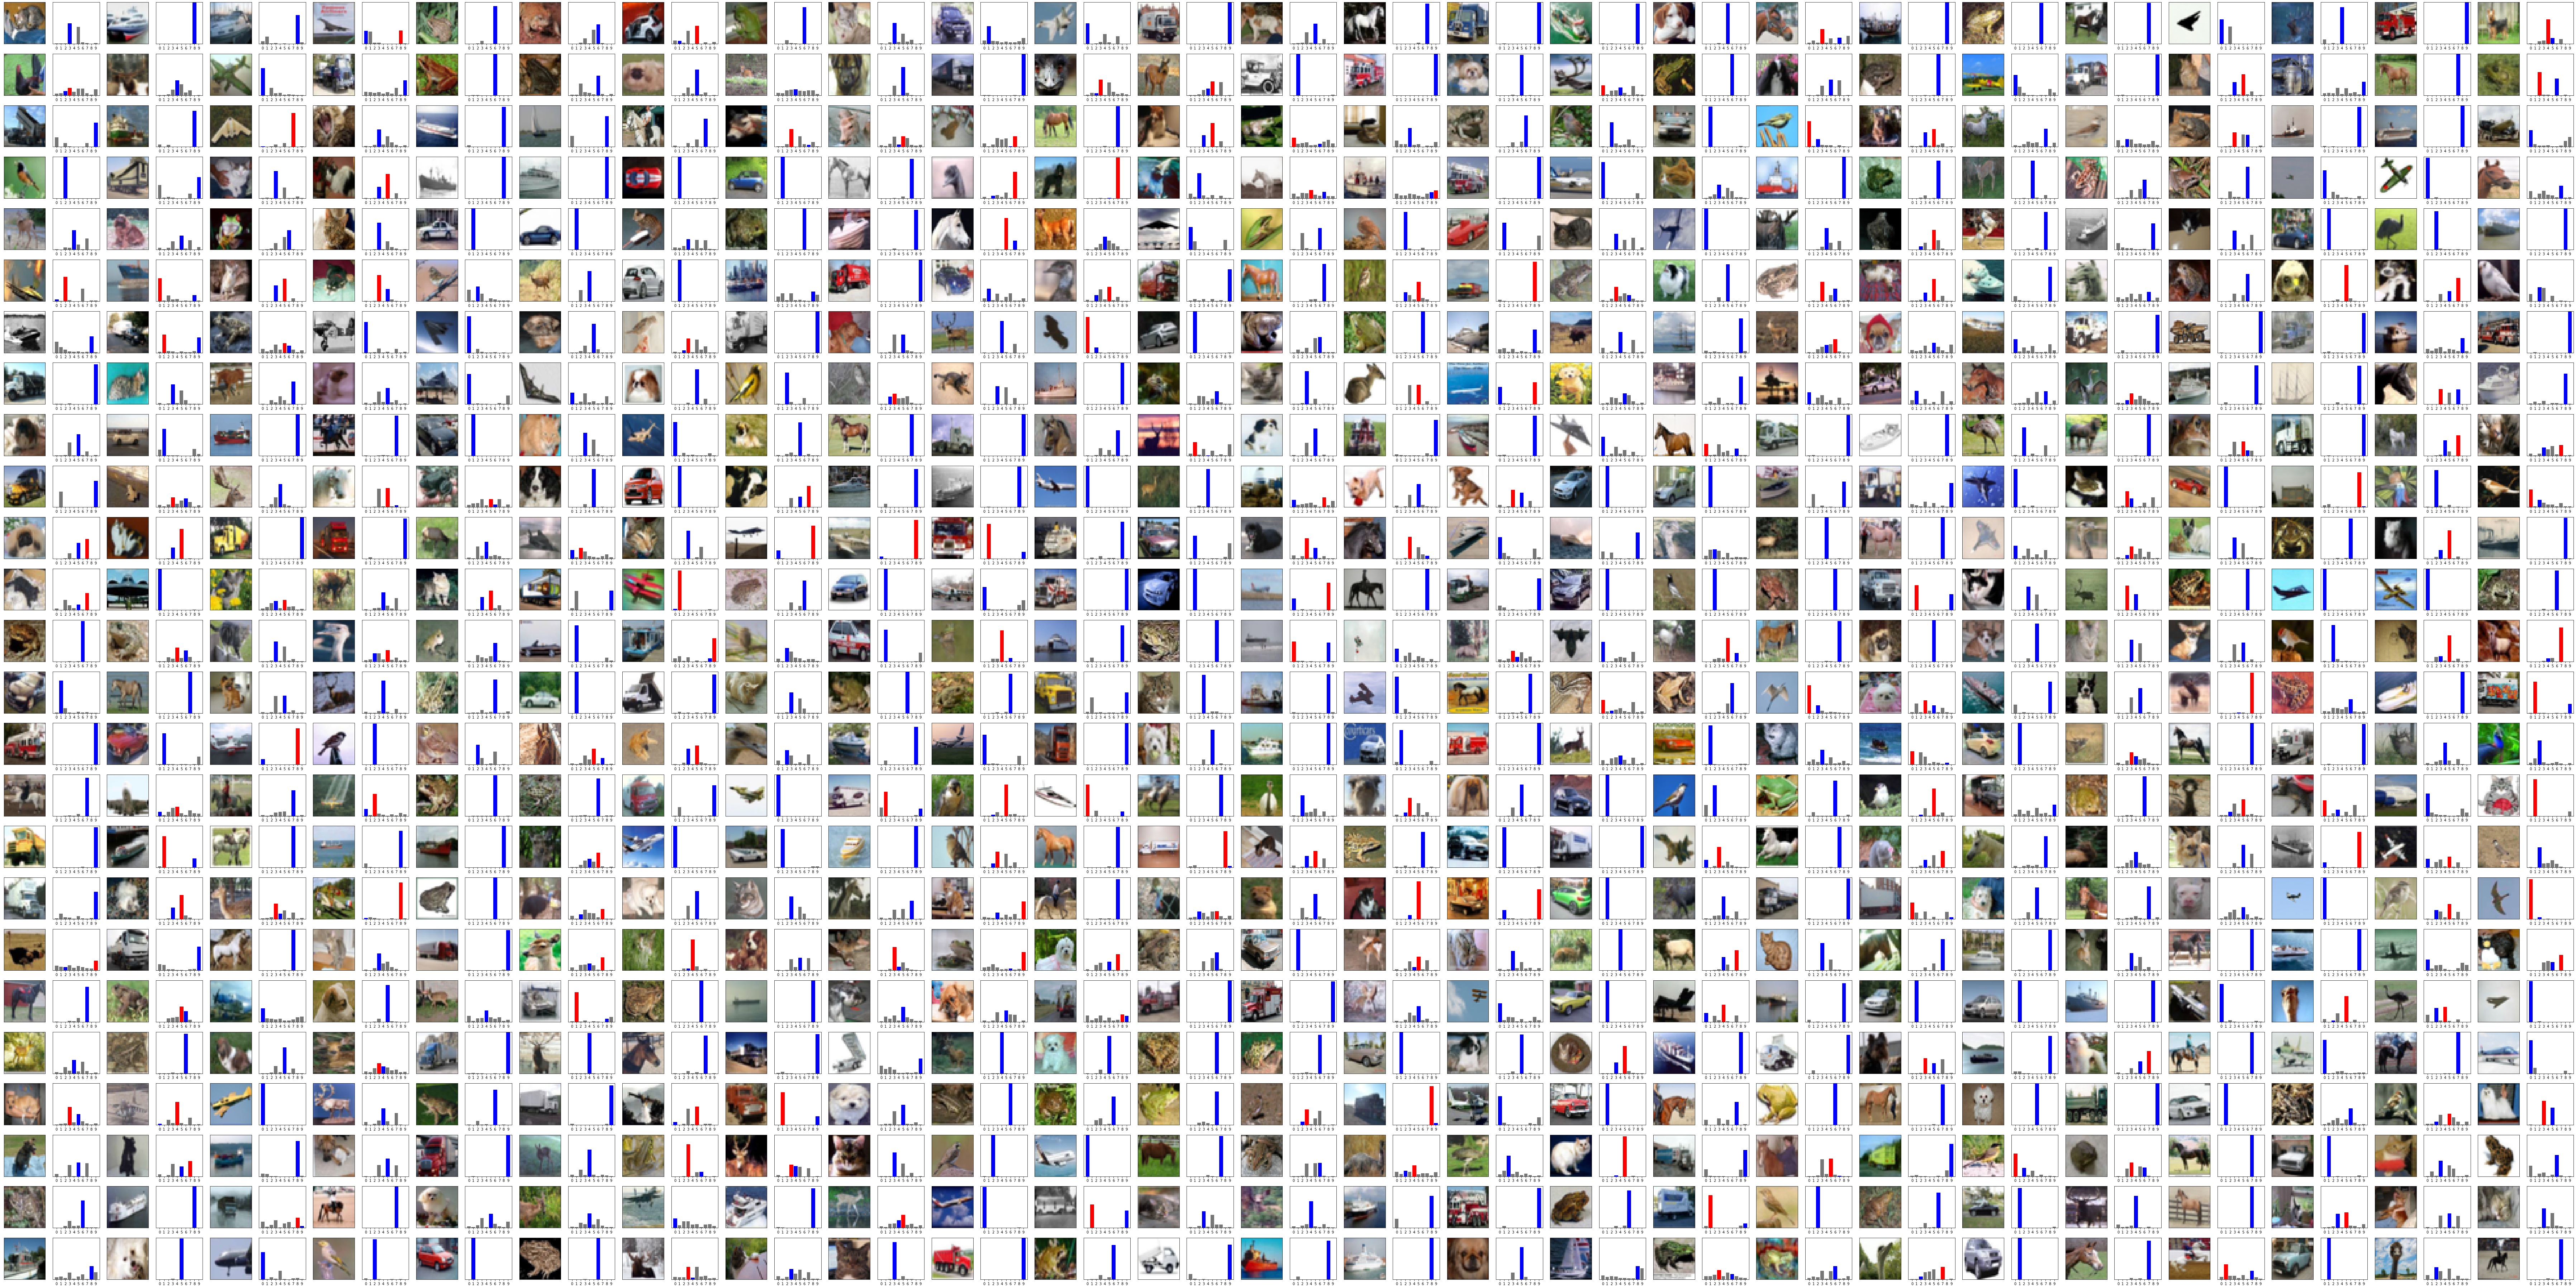

In [28]:
y_test= np.argmax(y_test, axis=1)
num_rows = 25
num_cols = 25
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(25*25):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()
    